In [36]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [37]:
data = pd.read_csv('Body.txt')
data.shape

(25977, 91)

In [38]:
data.head()

,time,id,class_id,x,y,z,vx,vy,vz,sigma_00,...,c_sigma_42,c_sigma_43,c_sigma_44,c_sigma_45,c_sigma_50,c_sigma_51,c_sigma_52,c_sigma_53,c_sigma_54,c_sigma_55
0,0.00,2457833853504,7,3.452,-0.145,-96.541,0.000,0.000,0.000,199.601,...,0.0,0.0,99840.574,0.0,0.0,0.0,1006.377,0.0,0.0,99840.574
1,0.00,2457833853728,7,-0.226,-1.349,-89.454,0.000,0.000,0.000,199.601,...,0.0,0.0,99840.574,0.0,0.0,0.0,1006.377,0.0,0.0,99840.574
2,0.04,2457833853504,7,3.507,-0.183,-96.872,0.612,-0.426,-3.685,128.569,...,0.0,0.0,99840.574,0.0,0.0,0.0,1006.377,0.0,0.0,99840.574
3,0.04,2457833853728,7,-0.209,-1.372,-88.698,0.182,-0.255,8.404,128.569,...,0.0,0.0,99840.574,0.0,0.0,0.0,1006.377,0.0,0.0,99840.574
4,0.08,2457833853504,7,3.579,-0.228,-97.404,1.181,-0.758,-8.294,128.173,...,0.0,0.0,99840.574,0.0,0.0,0.0,1006.377,0.0,0.0,99840.574


In [39]:
data['collision_p'].argmax()

2885

In [40]:
data.iloc[2885].collision_p

0.0080000000000000002

In [41]:
mu=np.array([data.iloc[2885].c_x, data.iloc[2885].c_y, data.iloc[2885].c_z])
mu

array([ 5.978, -6.696, -0.991])

In [42]:
s00=data.iloc[2885].c_sigma_00
s01=data.iloc[2885].c_sigma_01
s02=data.iloc[2885].c_sigma_02
s10=data.iloc[2885].c_sigma_10
s11=data.iloc[2885].c_sigma_11
s12=data.iloc[2885].c_sigma_12
s20=data.iloc[2885].c_sigma_20
s21=data.iloc[2885].c_sigma_21
s22=data.iloc[2885].c_sigma_22
s30=data.iloc[2885].c_sigma_20
s31=data.iloc[2885].c_sigma_31
s32=data.iloc[2885].c_sigma_32

In [43]:
v = np.array([[s00, s01, s02],
              [s10, s11, s12],
              [s20, s21, s22]])

In [44]:
v

array([[ 58.632,   0.   ,   0.   ],
       [  0.   ,  58.632,   0.   ],
       [  0.   ,   0.   ,  58.632]])

In [45]:
m=1000

In [46]:
loc_samples = np.random.multivariate_normal(mu, v, m)

In [47]:
loc_samples

array([[ 18.11815111,   9.53427058,   7.84164624],
       [  8.75866279, -24.57811651,  -2.0619081 ],
       [  0.10545375,  -9.20308259,  -1.9115536 ],
       ..., 
       [  0.28157519,  -4.91520647,   7.75198876],
       [  4.18739466, -14.64233506,  -3.784415  ],
       [ 10.79148905,  -2.78487823,   9.85853554]])

In [48]:
ri = np.random.lognormal(1.28, 0.25, m)/2 # car body sizes
r = np.random.lognormal(0.51, 0.07, m)/2 # observer (person) body sizes

In [49]:
p_collision = 0.0
for i in range(m):
    if np.linalg.norm(np.array([loc_samples[i,0], loc_samples[i,1], loc_samples[i,2]])) < (ri[i]+r[i]):
                      p_collision +=1
p_collision /= m
p_collision

0.014

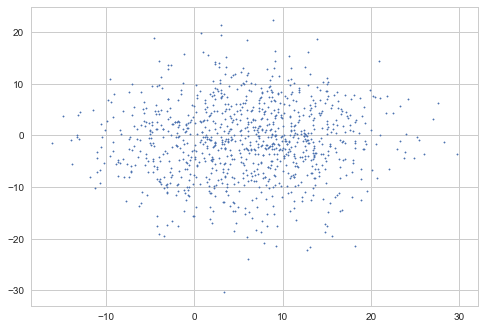

In [50]:
plt.scatter(loc_samples[:,0],loc_samples[:,2],alpha=1.0,s=2)

In [51]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    Make a scatter of circles plot of x vs y, where x and y are sequence 
    like objects of the same lengths. The size of circles are in data scale.

    Parameters
    ----------
    x,y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, ) 
        Radius of circle in data unit.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence 
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)  
        `c` can be a 2-D array in which the rows are RGB or RGBA, however. 
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls), 
        norm, cmap, transform, etc.

    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`

    Examples
    --------
    a = np.arange(11)
    circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')
    plt.colorbar()

    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """
    from matplotlib.patches import Circle
    from matplotlib.collections import PatchCollection

    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

In [52]:
observer_loc = np.zeros((m,1))

In [53]:
#circles(loc_samples[:,0],loc_samples[:,2], s=ri[:], c='black', alpha=0.2, edgecolor='none')
#circles(observer_loc[:],observer_loc[:], s=r[:], c='red', alpha=0.2, edgecolor='none')

In [54]:
data.iloc[2885].id

2457841325896.0

In [55]:
data_one = data[(data.id==2457841325896) ]
data_one = data_one.set_index('time')

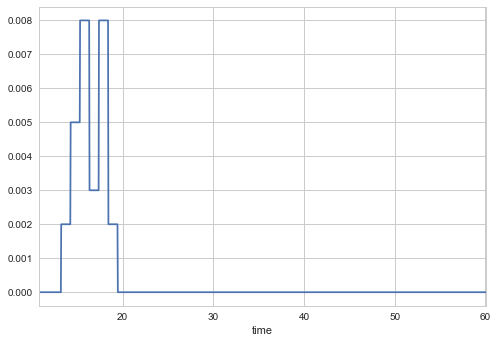

In [56]:
data_one['collision_p'].plot()

In [35]:
m

1000